In [40]:
import torch
import numpy as np
import seaborn as sns
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy.stats import rankdata, skewtest, skew
from core import SymmetryFinder, SymmetryFinder2, SymmetryFinderMeanBS, train_unsup
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import time
DATA_PATH = '../data/weak_dataset.npy'

In [41]:

def imshow(img, dim):
    img = img.reshape(dim) * 255
    plt.imshow(img, cmap='gray')
    plt.show()

In [42]:
# class TrainSet(torch.utils.data.Dataset):
#     def __init__(self, path, transform=None):
#         super().__init__()
#         self.path = path
#         self.data = np.load(path)
#         self.rows = self.data.shape[0]
#         self.cols = self.data.shape[1]
#         self.transform = transform
#
#     def __len__(self):
#         return self.rows
#
#     def __getitem__(self, idx):
#         sample = torch.tensor(self.data[idx], dtype=torch.float)
#         if self.transform:
#             sample = self.transform(sample)
#
#         return sample
#
# trainset = TrainSet(DATA_PATH)
# trainset.data = trainset.data/np.std(trainset.data)
# data = trainset[:].numpy()
#
#

In [43]:
# sym = SymmetryFinder(fit_method='loc_cov_adj', select_method=5)
# sym.fit(data)
# swaps = int((sym.trans_eigenvalues_ == -1).sum())
#

In [44]:
# sym.cov_eigenvalues_
#

In [45]:
# sym.tot_
#

In [46]:
# np.abs(sym.sol_)/np.sqrt(sym.cov_eigenvalues_)
#

In [47]:
# sym.stats_ * np.sqrt(250_000)
#

In [48]:
# sym.stats_ * np.sqrt(250_000) > 2
#

In [49]:
# np.linalg.norm(sym.mu_)
#

In [50]:
# print(rankdata(sym.stats_))
# print(rankdata(np.abs(sym.sol_)/np.sqrt(sym.cov_eigenvalues_)))
#

In [51]:
# sym2 = SymmetryFinder(fit_method='mean', select_method=5)
# sym2.fit(data)
#
#
#

In [52]:
# # # sym3 = SymmetryFinder(alpha=0.05, fit_method='skew', bootstraps=500, select_method=swaps)
# # # sym3.fit(data)
# #
# #
#

In [53]:
# img = sym.trans_
# fig, ax = plt.subplots(1, 2)
# # plt.imshow(img)
# ax[0].imshow(img)
# img2 = sym2.trans_
# ax[1].imshow(img2)
# # img3 = sym3.trans_
# # ax[2].imshow(img3)
# # plt.show()
#

In [54]:
# from copy import copy
#
# cov_rank = rankdata(sym.cov_eigenvalues_)
# stats = np.sqrt(sym.stats_)
# sns.lineplot(cov_rank, np.log(stats))
#

In [55]:
# sym.eigenvectors_[:, 3]
#

In [56]:
# stats = np.sqrt(sym.cov_eigenvalues_)
# sns.lineplot(cov_rank, stats)
# # print(stats)
#

In [57]:
# pos_data_frac = ((data @ sym.eigenvectors_) > 0).sum(axis=0) / data.shape[0]
# diffs = np.abs(pos_data_frac - 0.5)
# sns.lineplot(cov_rank, np.log(diffs))
#

In [58]:
# stats = np.abs(np.median(data @ sym.eigenvectors_, axis=0) - sym.sol_) / (2 * np.sqrt(sym.cov_eigenvalues_))
# sns.lineplot(cov_rank, np.log(stats))

In [59]:
# stats = np.sqrt(sym.cov_eigenvalues_)
# sns.lineplot(cov_rank, np.log(diffs))

In [60]:
# from scipy.linalg import block_diag
# sym_mat = block_diag(*[np.array([[0, 1], [1, 0]]) for _ in range(data.shape[1] // 2)])
# print(np.sqrt(np.mean((sym.trans_-sym_mat)**2)),
#       # np.sqrt(np.mean((sym2.trans_-sym_mat)**2)),
#       # np.sqrt(np.mean((sym3.trans_-sym_mat)**2))
#       )
#

In [61]:
# sym2.fine_tune(data, lr=0.1, epochs=1_000, bandwidth=10, weight_penalty_adj=100)
#

In [62]:
# print(np.sqrt(np.mean((sym2.trans_-sym_mat)**2)))
#

In [63]:
# print(np.sqrt(np.mean((sym2.trans_-sym_mat)**2)))
#

In [64]:
# img = sym2.trans_
# plt.imshow(img)
#
#

In [65]:
# from torch import optim
# import torch.nn as nn
# import torch.nn.functional as F

# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(trainset.cols, trainset.cols, bias=False)
#         self.trans = torch.block_diag(*[torch.tensor([[0, 1], [1, 0]], dtype=torch.float) for _ in range(trainset.cols // 2)])
#
#
#     def forward(self, x):
#         x = self.fc1(x)
#         x = F.linear(x, self.trans)
#         x = F.linear(x, self.fc1.weight.t())
#         return x
#
# # def init_weights(m):
# #     if type(m) == nn.Linear:
# #         torch.nn.init.orthogonal_(m.weight)
#
# class MyInit:
#     def __init__(self, fc1, trans):
#         self.fc1 = fc1
#         self.trans = trans
#
#     def __call__(self, model):
#         with torch.no_grad():
#             model.fc1.weight.copy_(self.fc1)
#             model.trans.copy_(self.trans)
#
#
#
# def split(X):
#     return X[:X.shape[0]//2], X[X.shape[0]//2:]
#
# def se_kernel(X, Y, sig2=1):
#     X_norms =  torch.mean(X ** 2, dim=1)
#     Y_norms = torch.mean(Y ** 2, dim=1)
#     # print(torch.exp(X_norms.unsqueeze(1) / (2 * sig2)).shape, torch.exp(Y_norms.unsqueeze(0) / (2 * sig2)).shape)
#     # print(X.shape, Y.shape)
#     return torch.exp(X @ Y.t() / (2 * sig2 * X.shape[1])) / (torch.exp(X_norms.unsqueeze(1) / (2 * sig2 * X.shape[1])) @
#                                                 torch.exp(Y_norms.unsqueeze(0) / (2 * sig2 * X.shape[1]))) * sig2
#
# def poly_kernel(X, Y, r=1, m=2, gamma=0.01):
#     return (r + gamma * X @ Y.t()) ** m
#
# class MMDLoss(nn.Module):
#     def __init__(self, kernel = se_kernel, **kwargs):
#         super().__init__()
#         self.kernel = kernel
#         self.kwargs = kwargs
#
#     def forward(self, X, Y):
#         kernel_dists = self.kernel(X, X, **self.kwargs) + self.kernel(Y, Y, **self.kwargs) - 2 * self.kernel(X, Y, **self.kwargs)
#         loss = torch.mean(kernel_dists)
#         return loss
#
# class SplitMMDLoss(nn.Module):
#     def __init__(self, kernel = se_kernel, **kwargs):
#         super().__init__()
#         self.kernel = kernel
#         self.kwargs = kwargs
#
#     def forward(self, X, Y):
#         X1, X2 = split(X)
#         Y1, Y2 = split(Y)
#         kernel_dists = self.kernel(X1, X2, **self.kwargs) + self.kernel(Y1, Y2, **self.kwargs) - \
#                        self.kernel(X1, Y2, **self.kwargs) - self.kernel(X2, Y1, **self.kwargs)
#         loss = torch.mean(kernel_dists)
#         return loss
#
# class DebiasedMMDLoss(nn.Module):
#     def __init__(self, kernel = se_kernel, **kwargs):
#         super().__init__()
#         self.kernel = kernel
#         self.kwargs = kwargs
#
#     def forward(self, X, Y):
#         kernel_dists = self.kernel(X, X, **self.kwargs) + \
#                        self.kernel(Y, Y, **self.kwargs) - \
#                        2 * self.kernel(X, Y, **self.kwargs)
#         mask = torch.eye(*kernel_dists.shape, device=kernel_dists.device).byte()
#         kernel_dists.masked_fill_(mask, 0)
#         loss = torch.mean(kernel_dists)
#         return loss



In [66]:
# my_init = MyInit(torch.tensor(sym.eigenvectors_.T), torch.tensor(np.diag(sym.trans_eigenvalues_)))
# BATCH_SIZE = 2048
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
#                                           shuffle=True, pin_memory=True)
#
# # criterion = DebiasedMMDLoss(kernel = poly_kernel, r=1, m=2, gamma=0.3)
# criterion = DebiasedMMDLoss(kernel = se_kernel, sig2=1)
# weight_criterion = nn.MSELoss()
#
# stride = len(trainset) // (BATCH_SIZE * 3)


In [67]:
# from windows_inhibitor import WindowsInhibitor
#
# device='cuda:0'
#
# with WindowsInhibitor():
#     train_unsup(trainloader, Net, device, optim.SGD, criterion, weight_criterion, init=my_init,
#                 use_saved=False, error_display_stride=5, inter_error_stride=stride, epochs=50,
#                 optimizer_params={'lr': 0.03, 'momentum': 0.5, 'weight_decay': 0},
#                 weight_penalty_adj=10)


In [68]:
# net = Net()
# net.load_state_dict(torch.load('state_dict.pt'))
# mat_ft = (net.fc1.weight.t() @ torch.tensor(np.diag(sym.trans_eigenvalues_), dtype=torch.float) @ net.fc1.weight).detach().numpy()
# print(np.sqrt(np.mean((sym.trans_-sym_mat)**2)), np.sqrt(np.mean((mat_ft-sym_mat)**2)))
#

In [69]:
# img = sym.trans_
# fig, ax = plt.subplots(1, 2)
# ax[0].imshow(img)
# img2 = mat_ft
# ax[1].imshow(img2)
#


In [70]:
# # img = sym.trans_
# # fig, ax = plt.subplots(figsize=(10, 8))
# # plt.imshow(img)
# # # ax.xaxis.set_major_locator(MultipleLocator(dim[0]))
# # # ax.yaxis.set_major_locator(MultipleLocator(dim[0]))
# # # plt.grid()
# # plt.show()
#

In [71]:
# for j, la in enumerate(sym.trans_eigenvalues_):
#     # if la == 1:
#     #     continue
#     eig = sym.eigenvectors_[:, j]
#     pos_pts = []
#     for i, x in enumerate(data):
#         if x @ eig > 0:
#             pos_pts.append(i)
#     pos_pts = np.array(pos_pts)
#     print(j, la, len(pos_pts))
#

In [72]:
# sym.cov_eigenvalues_
#
#

In [73]:
# sym.cov_eigenvalues_
#

In [74]:
# sym.eigenvectors_[:, 10]
#

In [75]:
# sns.distplot(sym.sol_/sym.cov_eigenvalues_, bins=10)
#

In [76]:
# np.round(sym.sol_/sym.cov_eigenvalues_, 3)


In [77]:
import torchvision.transforms.functional as funct
dim = (10, 10)

transform = transforms.Compose(
    [
    lambda x: funct.rotate(x, angle=-90),
    # transforms.RandomHorizontalFlip(),
    transforms.Resize(dim),
    transforms.ToTensor(),
     lambda x: x.view(-1),
     lambda x: x.numpy()])

trainset = torchvision.datasets.EMNIST(root='../data', train=True,
                                        download=True, transform=transform,
                                        split="digits",
                                      )
# testset = torchvision.datasets.EMNIST(root='./data', train=False,
#                                        download=True, transform=transform, split="digits")

# idx = (trainset.targets == 6)
# trainset.targets = trainset.targets[idx]
# trainset.data = trainset.data[idx]
data2 = np.array([x for i, (x, label) in enumerate(trainset)])

In [78]:
cov = np.cov(data2, rowvar=False)
eigen = np.linalg.eig(cov)
cov_eigenvalues = np.real(eigen[0])
eigenvectors = np.real(eigen[1])
mu = np.mean(data2, axis=0)
sol = np.linalg.solve(eigenvectors, mu)
num_trivial_vectors = np.sum((sol < SymmetryFinder.ignore_threshold) & \
                             (cov_eigenvalues < SymmetryFinder.ignore_threshold))
swaps = int((dim[0] * dim[1] - num_trivial_vectors) // 2)
# symm = SymmetryFinder(alpha=0.05, fit_method='median', select_method='mean_rotate_bs')
symm = SymmetryFinder(fit_method='sign', select_method='mmd', scoring_sig=3, cov_adj_score=True, la=0.03)
symm.fit(data2, cov=cov)

4 -4.705740538983858
5 -4.39061300861965
6 -4.546054038048315
7 -5.515244778744494
8 -5.739638738709113
9 -6.3181645910810245
10 -7.596445177017918
11 -8.122105851209263
12 -8.15576033010127
13 -8.216895981234073
14 -8.314023143161517
15 -9.666518697831652
16 -9.874890262559308
17 -9.898846562881412
18 -9.975500611508322
19 -9.721425763909725
20 -9.909943995097363
21 -10.078915485994056
22 -10.23559552659378
23 -10.290896616908366
24 -10.379000802697119
25 -10.567941584533198
26 -10.2852609143111
27 -10.453224078657131
28 -10.455082352619742
29 -10.367797203675334
30 -10.795569630770354
31 -10.471950540973548
32 -10.580785504912862
33 -10.779800467946965
34 -10.92449734006671
35 -10.983778666462936
36 -11.037150712786268
37 -10.952760818391047
38 -11.081636602910093
39 -11.042924290370129
40 -12.41276129741769
41 -12.709732886738582
42 -12.975601066491382
43 -13.093159860404679
44 -13.135487885792646
45 -13.097796539251362
46 -13.171170174745082
47 -13.326543976356968
48 -13.3497130211

SymmetryFinder(cov_adj_score=True, fit_method='sign', la=0.03,
               select_method='mmd')

In [79]:
symm.fine_tune(data2, lr=0.0001, bandwidth=10, weight_penalty_adj=200, epochs=20)

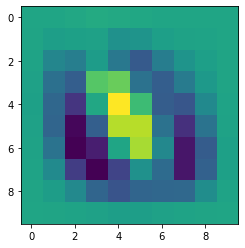

In [80]:
img = symm.eigenvectors_[:, -1].reshape(dim)
# np.round(img, 2)
plt.imshow(img)

In [81]:
import math

def horiz_flip_gt_accuracy(model):
    # flip = transforms.RandomHorizontalFlip(p=1.)
    # eigenvector1 = model.eigenvectors_.reshape(dim[0], dim[1], -1)

    eigenvectors = model.eigenvectors_.T.reshape(-1, dim[0], dim[1])
    diff = np.array([eigenvectors[i].reshape(-1, dim[0]*dim[1]) @ eigenvectors[i,:,::-1].reshape(-1, dim[0]*dim[1]).T for i in range(eigenvectors.shape[0])])
    diff = diff.reshape(-1)
    diff = np.arccos(diff) * 180/np.pi
    # eigenvectors
    # eigenvector2 = model.eigenvectors_.reshape(dim[0], dim[1], -1)[:,::-1].reshape(dim[0] * dim[1] ,-1)
    # eigenvector1 = model.eigenvectors_
    # diff = np.tensordot(eigenvectors, eigenvectors[:,:,::-1], axes=[(1, 2), (1,2)]).diagonal()
    # diff = np.array(np.linalg.multi_dot(np.stack((eigenvector2, eigenvector1), axis=1)))
    diff[diff > 120] = -1
    diff[(120 >= diff) & (diff >= 60)] = 0
    diff[(0 < diff) & (diff < 60)] = 1
    return np.linalg.norm((diff == model.trans_eigenvalues_), ord=1)/sum((diff != 0)), sum((diff != 0))/len(diff)

# my_diff = horiz_flip_gt_accuracy(symm)
# print(my_diff)

In [82]:
# sns.lineplot(range(4,100+1), np.log(-np.array(symm.mmd_errors_)))

In [83]:
sum(symm.trans_eigenvalues_ == -1), sum(symm.trans_eigenvalues_ == 1)

(5, 95)

In [84]:
# stats = symm.stats_[~(np.isnan(symm.stats_)|(symm.stats_==0))]
# # stats = np.sqrt(symm.cov_eigenvalues_)
# sns.distplot(np.log(stats), bins=200)

In [85]:
# import statistics
# stats = symm.stats_[~(np.isnan(symm.stats_)|(symm.stats_==0))]
# # stats = np.sqrt(symm.cov_eigenvalues_)
# sns.distplot(np.log(stats), bins=200, kde_kws={'bw':0.2})
# plt.axvline(statistics.median(np.log(stats)), 0, 1, color='r')
# plt.xlim([-20,10])
#

In [86]:
# print(sum(symm.trans_eigenvalues_ == -1))
# print(sum(symm.trans_eigenvalues_ == 1))
#

In [87]:
# stats = symm.stats_[~(np.isnan(symm.stats_))]
#
# eigenvalues = symm.trans_eigenvalues_[~np.isnan(symm.stats_)]
#
# sns.lineplot(range(len(stats)), np.log(stats), hue=eigenvalues)
#


In [88]:
# ax = sns.scatterplot(range(len(stats)), np.log(stats), hue=eigenvalues)
# plt.show()
#

In [89]:
# thresh = np.sqrt(np.log(50_000))/np.sqrt(50_000)
# print(sum(raw > thresh), sum(raw < thresh))
#

In [90]:
# sols = symm.stats_[~np.isnan(symm.stats_)][100:]
# covs = symm.cov_eigenvalues_[~np.isnan(symm.stats_)][100:]
# sns.scatterplot(np.log(covs), np.log(np.abs(sols)), hue=eigenvalues[100:],
#                 s=10)

In [91]:
# from sklearn.linear_model import LinearRegression
#
# linear = LinearRegression()
# linear.fit(np.log(covs).reshape(-1, 1), np.log(np.abs(sols)))
# print(linear.coef_, linear.intercept_)

In [92]:
# stats = symm.sol_
# # stats = np.sqrt(symm.cov_eigenvalues_)
# sns.lineplot(range(len(stats)), np.log(np.abs(stats)))
#

C:\Users\Work\Anaconda3\envs\Conda_test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

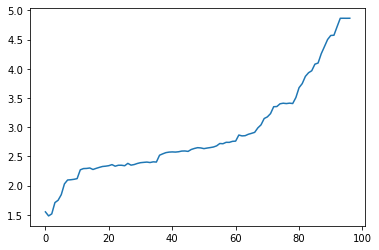

In [93]:
stats = np.array(symm.mmd_errors_)
sns.lineplot(range(len(stats)), np.log(-stats))

In [94]:

[(i, x) for i, x in enumerate(symm.mmd_errors_)]

[(0, -4.705740538983858),
 (1, -4.39061300861965),
 (2, -4.546054038048315),
 (3, -5.515244778744494),
 (4, -5.739638738709113),
 (5, -6.3181645910810245),
 (6, -7.596445177017918),
 (7, -8.122105851209263),
 (8, -8.15576033010127),
 (9, -8.216895981234073),
 (10, -8.314023143161517),
 (11, -9.666518697831652),
 (12, -9.874890262559308),
 (13, -9.898846562881412),
 (14, -9.975500611508322),
 (15, -9.721425763909725),
 (16, -9.909943995097363),
 (17, -10.078915485994056),
 (18, -10.23559552659378),
 (19, -10.290896616908366),
 (20, -10.379000802697119),
 (21, -10.567941584533198),
 (22, -10.2852609143111),
 (23, -10.453224078657131),
 (24, -10.455082352619742),
 (25, -10.367797203675334),
 (26, -10.795569630770354),
 (27, -10.471950540973548),
 (28, -10.580785504912862),
 (29, -10.779800467946965),
 (30, -10.92449734006671),
 (31, -10.983778666462936),
 (32, -11.037150712786268),
 (33, -10.952760818391047),
 (34, -11.081636602910093),
 (35, -11.042924290370129),
 (36, -12.41276129741769

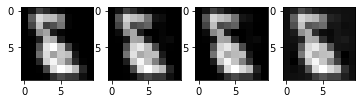

In [95]:

orig_img = data2[15]
fig, ax = plt.subplots(1,4)
img1 = orig_img.reshape(dim) * 255
ax[0].imshow(img1, cmap='gray')
img2 = (np.clip(orig_img @ symm.trans_, 0, 1)).reshape(dim) * 255
ax[1].imshow(img2, cmap='gray')
img3 = (np.clip(symm.predict(orig_img), 0, 1)).reshape(dim) * 255
ax[2].imshow(img3, cmap='gray')
img3 = (symm.predict(orig_img)).reshape(dim) * 255
ax[3].imshow(img3, cmap='gray')

plt.show()

In [96]:
symm.select_method = 65
sum(symm.trans_eigenvalues_ == -1), sum(symm.trans_eigenvalues_ == 1)
symm.fine_tune(data2, lr=0.01, bandwidth=10, weight_penalty_adj=200, epochs=20)


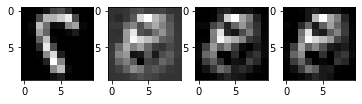

In [97]:
orig_img = data2[6]
fig, ax = plt.subplots(1,4)
img1 = orig_img.reshape(dim) * 255
ax[0].imshow(img1, cmap='gray')
img2 = (orig_img @ symm.trans_).reshape(dim) * 255
ax[1].imshow(img2, cmap='gray')
img3 = (np.clip(orig_img @ symm.trans_, 0, 1)).reshape(dim) * 255
ax[2].imshow(img3, cmap='gray')
img4 = (np.clip(symm.predict(orig_img), 0, 1)).reshape(dim) * 255
ax[3].imshow(img4, cmap='gray')

plt.show()

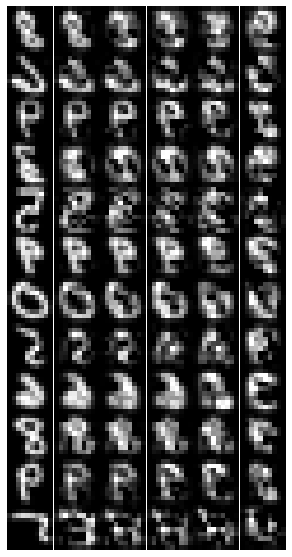

In [98]:
rows = 12
models = [0, 13, 23, 45, 65, 89]
fig, ax = plt.subplots(rows, len(models), figsize=(5, 10))

fig.subplots_adjust(hspace=0, wspace=0)
for j in range(rows):
    orig_img = data2[5 * j]
    for i, model_size in enumerate(models):
        symm.select_method = model_size
        # sum(symm.trans_eigenvalues_ == -1), sum(symm.trans_eigenvalues_ == 1)
        # symm.fine_tune(data2, lr=0.0001, bandwidth=10, weight_penalty_adj=200, epochs=20)

        # img1 = orig_img.reshape(dim) * 255
        # ax[i, 0].imshow(img1, cmap='gray')
        # ax[i, 0].axis('off')
        # img0 = (orig_img @ symm.trans_).reshape(dim) * 255
        # ax[0, i].imshow(img0, cmap='gray')
        # ax[0, i].axis('off')
        img = (np.clip(orig_img @ symm.trans_, 0, 1)).reshape(dim) * 255
        ax[j, i].imshow(img, cmap='gray')
        ax[j, i].axis('off')
        # img4 = (np.clip(symm.predict(orig_img), 0, 1)).reshape(dim) * 255
        # ax[i, 3].imshow(img4, cmap='gray')

plt.show()

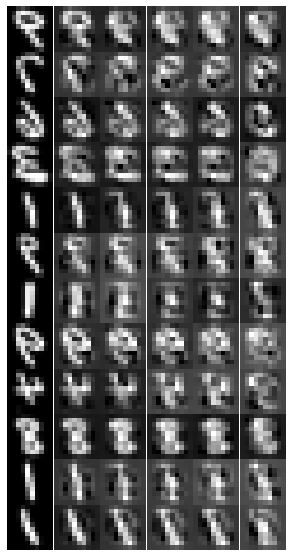

In [99]:
rows = 12
models = [0, 10, 20, 40, 60, 80]
fig, ax = plt.subplots(rows, len(models), figsize=(5, 10))

fig.subplots_adjust(hspace=0, wspace=0)
for j in range(rows):
    orig_img = data2[1 + 5 * j]
    for i, model_size in enumerate(models):
        symm.select_method = model_size
        # sum(symm.trans_eigenvalues_ == -1), sum(symm.trans_eigenvalues_ == 1)
        # symm.fine_tune(data2, lr=0.0001, bandwidth=10, weight_penalty_adj=200, epochs=20)

        # img1 = orig_img.reshape(dim) * 255
        # ax[i, 0].imshow(img1, cmap='gray')
        # ax[i, 0].axis('off')
        # img0 = (orig_img @ symm.trans_).reshape(dim) * 255
        # ax[0, i].imshow(img0, cmap='gray')
        # ax[0, i].axis('off')
        img = (orig_img @ symm.trans_).reshape(dim) * 255
        ax[j, i].imshow(img, cmap='gray')
        ax[j, i].axis('off')
        # img4 = (np.clip(symm.predict(orig_img), 0, 1)).reshape(dim) * 255
        # ax[i, 3].imshow(img4, cmap='gray')
# fig.savefig("6s")
plt.show()

In [115]:
# import dill
#
# with open("../data/symm_net.pkl", "bw") as f:
#     dill.dump(symm, f)


In [100]:
# np.linalg.norm(symm.trans_ - symm.ft_trans_)
#

In [101]:
# np.linalg.norm(symm.trans_)
#

In [102]:
# img = symm.trans_
# fig, ax = plt.subplots(figsize=(10, 8))
# plt.imshow(img)
# ax.set_xticks(np.arange(-0.5, dim[0]*dim[1], dim[0]))
# ax.set_yticks(np.arange(-0.5, dim[0]*dim[1], dim[0]))
# # ax.xaxis.set_major_locator(MultipleLocator(dim[0]))
# # ax.yaxis.set_major_locator(MultipleLocator(dim[0]))
# plt.grid()
# plt.show()
# # imshow(new_mat)
#
#

In [103]:
# orig_img = data2[1]
# fig, ax = plt.subplots(1,2)
# img1 = orig_img.reshape(dim) * 255
# ax[0].imshow(img1, cmap='gray')
# img2 = (symm.trans_ @ orig_img).reshape(dim) * 255
# ax[1].imshow(img2, cmap='gray')
#
# plt.show()
#

In [104]:
# # changed_eigenvalues = copy(symm.trans_eigenvalues_)
# # changed_eigenvalues[1] = 1
# # changed_eigenvalues[3] = 1
# # changed_eigenvalues[6] = 1
# # changed_eigenvalues[7] = 1
# # changed_eigenvalues[8] = 1
# # new_trans = symm.eigenvectors_ @ np.diag(changed_eigenvalues) @ symm.eigenvectors_.T
# #
# # fig, ax = plt.subplots(1,2)
# # img1 = orig_img.reshape(dim) * 255
# # ax[0].imshow(img1, cmap='gray')
# # img2 = (new_trans @ orig_img).reshape(dim) * 255
# # ax[1].imshow(img2, cmap='gray')
# #
# # plt.show()
#

In [105]:
# testset[0]
#
#

In [106]:
# full_train = torchvision.datasets.MNIST(root='../data', train=True,
#                                         download=True, transform=transform)
#
#
#

In [107]:
# imshow(full_train[0][0])
#

In [108]:
# imshow(new_mat @ full_train[0][0])
#
#

In [109]:


# img = new_mat
# fig, ax = plt.subplots(figsize=(10, 8))
# plt.imshow(img)
# # ax.set_xticks(np.arange(0, 101, 10))
# # ax.set_yticks(np.arange(0, 101, 10))
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.yaxis.set_major_locator(MultipleLocator(10))
# plt.grid()
# plt.show()
# # imshow(new_mat)
#

In [110]:
# data_points = []
# eig1 = symm.eigenvectors_[:, 0]
# eig2 = symm.eigenvectors_[:, 1]
# xs = []
# ys = []
# for i, (x, target) in enumerate(trainset):
#     xs.append(x @ eig1)
#     ys.append(x @ eig2)
# sns.scatterplot(xs, ys)
#
#

In [111]:
# np.array([[0, 1], [2, 3]]) - np.array([5, 10])
#

In [112]:
# from sklearn.neighbors import NearestNeighbors
#
# base_eles = np.array([[0, 1], [1, 0]], dtype=np.float)
# eles_2 = np.array([[2, 1], [.5, 1]], dtype=np.float)
# nearest_neighbor = NearestNeighbors(n_neighbors=1)
# nearest_neighbor.fit(base_eles)
# dists, corr = nearest_neighbor.kneighbors(eles_2)
# print(dists, corr)
# print(dists[corr])
#

In [113]:
# np.stack([np.array([0, 1]), np.array([5, 10])])
#

In [114]:
# np.sort(eles_2, axis=0)